In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf

import imblearn

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from matplotlib import gridspec
from collections import Counter
from imblearn.over_sampling import SMOTE

import copy
import math
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

from sklearn.feature_selection import f_classif
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

data = pd.read_csv("/creditcard.csv")

In [2]:
fraud_indices = np.array(data[data.Class == 1].index)
number_records_fraud = len(fraud_indices)
print(number_records_fraud)

normal_indices = data[data.Class == 0].index

len(normal_indices)

# Random select N indices from non fraudulent samples (N equals to number of fraudulent records)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
random_normal_indices = np.array(random_normal_indices)
print(len(random_normal_indices))


under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
print(len(under_sample_indices))

under_sample_data = data.iloc[under_sample_indices,:]



492
492
984


In [3]:
X = under_sample_data.iloc[:, :-1].values
y = under_sample_data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

data = data.drop(['Time'],axis=1)
data.head()

from sklearn.preprocessing import StandardScaler
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))  # Normalize 'Amount' in [-1,+1] range
data = data.drop(['Amount'],axis=1)

# X_train = np.array(X_train)
# X_test = np.array(X_test)
# y_train = np.array(y_train)
# y_test = np.array(y_test)

X_train.shape (659, 30) y_train.shape (659,)
X_test.shape (325, 30) y_test.shape (325,)


In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

#Model Architecture

#tf.random.set_seed(1234) # for consistent results

model = Sequential([
    Dense(units=16, input_dim = 30,activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(24,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),                       
])

model.summary()

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=40)

score = model.evaluate(X_test, y_test)

print(score)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dense_1 (Dense)             (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dense_3 (Dense)             (None, 24)                600       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 2,129
Trainable params: 2,129
Non-trainabl

2024-09-05 13:23:16.153421: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


44/44 [==============================] - 0s 395us/step - loss: 199.2992 - accuracy: 0.5038
Epoch 5/5
11/11 [==============================] - 0s 361us/step - loss: 21.6503 - accuracy: 0.4862
[21.650283813476562, 0.48615384101867676]


11/11 [==============================] - 0s 291us/step


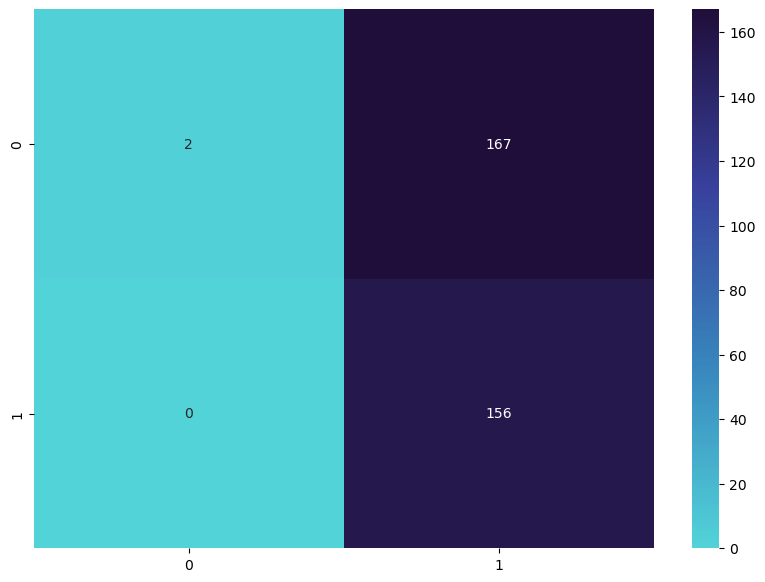

Test Data Accuracy: 0.4862


In [5]:
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.colors as mcolors

# Define the custom colormap
colors = ['#52D3D8', '#3887BE', '#38419D', '#200E3A']
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", colors)

# Assuming y_pred and y_test are defined as in your code
y_pred = model.predict(X_test)

# Binarize the predictions
y_pred = (y_pred > 0.5).astype(int)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Convert confusion matrix to a DataFrame for better visualization
df_cm = pd.DataFrame(cm, index=[0, 1], columns=[0, 1])

# Plot the confusion matrix with the custom color scheme
plt.figure(figsize=(10, 7))
sn.heatmap(df_cm, annot=True, fmt='g', cmap=cmap)
plt.show()

# Print the accuracy
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))